# Plotting Distribution of Demographic Information in DGC Migraine Study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plot_functions.load_palette import load_palette
import data_processing.import_data as imp

In [2]:
palette = load_palette()
demog_df = imp.import_demographic_file()

In [3]:
print(demog_df.columns.tolist())
demog_df.head()

['subject_id', 'final_subject_status', 'final_data_status', 'scid_date', 'scid_dx_1', 'scid_dx_2', 'scid_dx_3', 'scid_dx_4', 'scid_dx_5', 'scid_dx_6', 'scid_dx_7', 'scid_dx_8', 'scid_dx_9', 'scid_dx_10', 'scid_dx_11', 'scid_dx_12', 'scid_dx_13', 'scid_dx_14', 'scid_dx_15', 'scid_dx_16', 'scid_dx_17', 'scid_dx_18', 'scid_dx_19', 'scid_dx_20', 'dabst_dx', 'dabst_current_yrs', 'dabst_current_mos', 'dabst_current_wks', 'dabst_current_episode', 'dabst_num_episodes', 'dabst_first_dx', 'dabst_first_episode', 'dabst_duration', 'hamd_suicide_r_bs', 'hamd_total_bs', 'hamd_suicide_r_fp', 'hamd_total_fp', 'demog_gender', 'demog_gender_curr', 'demog_transgender', 'demog_sex_orient', 'demog_sex_orient_2', 'demog_maritalstatus', 'demog_language_1', 'demog_language_1_specify', 'demog_language_2', 'demog_language_2_specify', 'demog_household_num', 'demog_highest_education', 'demog_fam_income', 'demog_personal_income', 'sds_score_bs', 'sds_score_fp', 'adver_pb_warmth_m', 'adver_pb_protectiveness_m', 'ad

,subject_id,final_subject_status,final_data_status,scid_date,scid_dx_1,scid_dx_2,scid_dx_3,scid_dx_4,scid_dx_5,scid_dx_6,...,catmh_mdd_diagnosis_fp,catmh_dep_severity_fp,catmh_dep_category_fp,catmh_anx_severity_fp,catmh_anx_category_fp,catmh_mania_severity_fp,catmh_mania_category_fp,catmh_ss_diagnosis_fp,catmh_ss_severity_fp,catmh_ss_category_fp
1,m2_0001,Complete,Complete / Include,2017-06-20 12:30:00,Past Major Depressive Episode #1,300.4 Current Persistent Depressive Disorder ...,300.4 Past Persistent Depressive Disorder #1 ...,"296.22 Major Depressive Disorder, Single Epis...",300.3 Obsessive-Compulsive Disorder,NaN,...,Positive,68.4,Moderate,66.0,Severe,3.2,Normal,Negative,NaN,NaN
2,m2_0002,Complete,Complete / Include,2017-08-22 14:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,Negative,35.7,Normal,24.4,Normal,0.0,Normal,Negative,NaN,NaN
3,m2_0003,Complete,Complete / Include,2017-08-29 11:12:00,"Past Major Depressive Episode, With Peripartum...",NaN,NaN,NaN,NaN,NaN,...,Positive,43.6,Normal,25.1,Normal,0.0,Normal,Negative,NaN,NaN
4,m2_0005,Complete,Complete / Include,2017-09-08 11:00:00,Past Major Depressive Episode #1,"296.35 Major Depressive Disorder, Recurrent, ...",300.23 Social Anxiety Disorder Current In Pa...,300.29 Specific Phobia,NaN,NaN,...,Positive,65.6,Moderate,31.3,Normal,15.7,Normal,Negative,NaN,NaN
5,m2_0006,Complete,Complete / Include,2017-09-22 14:30:00,"296.26 Major Depressive Disorder, Single Epis...",NaN,NaN,NaN,NaN,NaN,...,Negative,25.3,Normal,28.8,Normal,46.5,Normal,Negative,NaN,NaN


(array([1., 4., 1., 6., 3., 1., 0., 1., 2., 5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

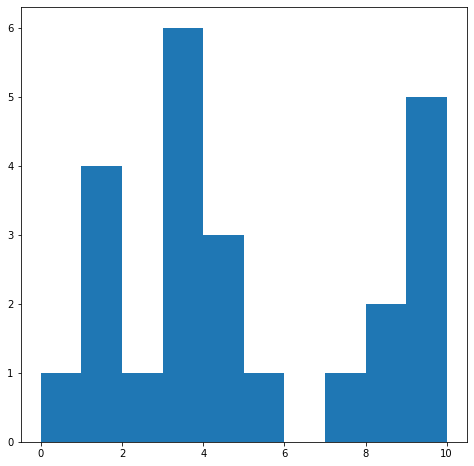

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(
    demog_df['stres_total_score'],
)

In [7]:
scid_cols = ['record_id'] + [c for c in demog_df.columns if 'scid' in c]

In [9]:
scid_df = demog_df[scid_cols]
scid_df.head()

,record_id,scid_date,scid_dx_1,scid_dx_2,scid_dx_3,scid_dx_4,scid_dx_5,scid_dx_6,scid_dx_7,scid_dx_8,...,scid_dx_11,scid_dx_12,scid_dx_13,scid_dx_14,scid_dx_15,scid_dx_16,scid_dx_17,scid_dx_18,scid_dx_19,scid_dx_20
1,m2_0001,2017-06-20 12:30:00,Past Major Depressive Episode #1,300.4 Current Persistent Depressive Disorder ...,300.4 Past Persistent Depressive Disorder #1 ...,"296.22 Major Depressive Disorder, Single Epis...",300.3 Obsessive-Compulsive Disorder,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m2_0002,2017-08-22 14:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,m2_0003,2017-08-29 11:12:00,"Past Major Depressive Episode, With Peripartum...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,m2_0005,2017-09-08 11:00:00,Past Major Depressive Episode #1,"296.35 Major Depressive Disorder, Recurrent, ...",300.23 Social Anxiety Disorder Current In Pa...,300.29 Specific Phobia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,m2_0006,2017-09-22 14:30:00,"296.26 Major Depressive Disorder, Single Epis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
demog_df[['dabst_dx', 'catmh_dep_severity_bs', 'hamd_total_fp', 'demog_highest_education']]

,dabst_dx,catmh_dep_severity_bs,hamd_total_fp,demog_highest_education
1,Unipolar,62.2,19,"Associate's Degree; Occupational, Technical, o..."
2,No depression,23.5,4,"Doctoral Degree (ex. PhD, EdD)"
3,No depression,45.7,10,"Bachelor's Degree (ex. BA, AB, BS, BBA)"
4,Unipolar,67.8,10,"Master's Degree (ex. MA, MS, MEng, MEd, MBA)"
5,Unipolar,20.6,11,"Bachelor's Degree (ex. BA, AB, BS, BBA)"
6,No depression,51.4,14,"Bachelor's Degree (ex. BA, AB, BS, BBA)"
7,Unipolar,31.7,14,Some college
8,Unipolar,61.7,16,Some college
9,No depression,48.4,12,"Bachelor's Degree (ex. BA, AB, BS, BBA)"
10,Bipolar,58.7,18,"Bachelor's Degree (ex. BA, AB, BS, BBA)"


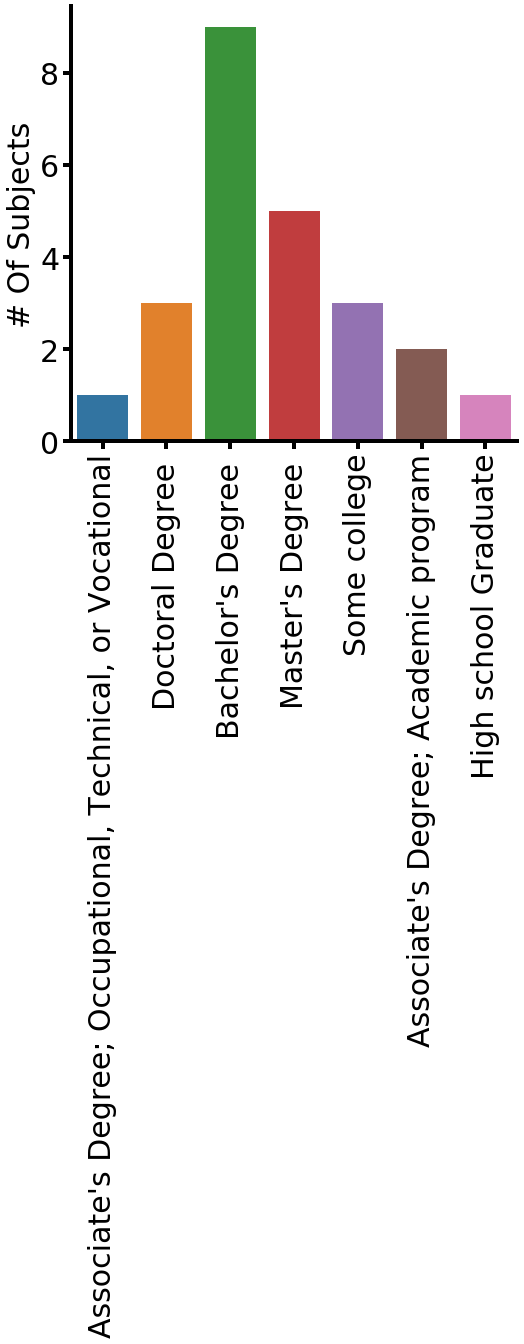

In [45]:
import plot_functions.format_axis as fmt
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    demog_df['demog_highest_education'].str.split('(').str[0],
    ax=ax,
)
ax.set_ylabel('# Of Subjects', fontsize=20)
ax.set_xlabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=90,
)
sns.despine()
ax.tick_params(axis='x', rotation=90)

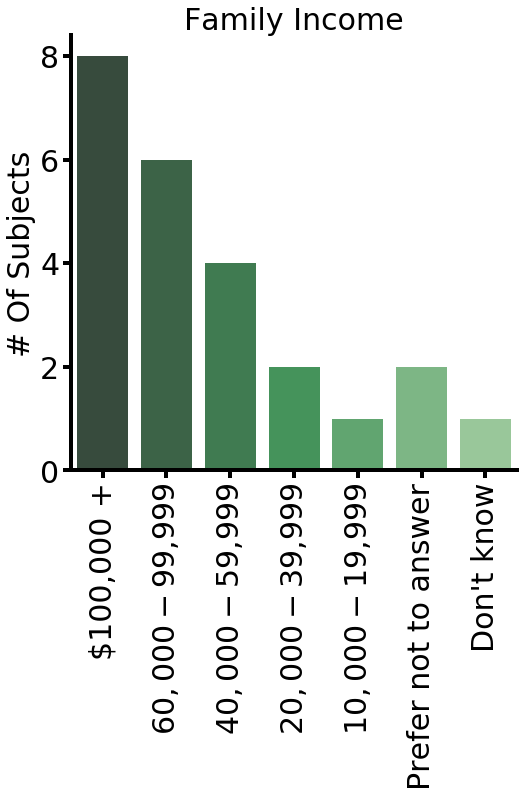

In [20]:
import plot_functions.format_axis as fmt
order = [
    '$100,000 +',
    '$60,000 - $99,999',
    '$40,000 - $59,999',
    '$20,000 - $39,999',
    '$10,000 - $19,999',
    'Prefer not to answer',
    "Don't know",
]
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(
    demog_df['demog_fam_income'],
    ax=ax,
    order=order,
    palette='Greens_d'
)
ax.set_ylabel('# Of Subjects', fontsize=20)
ax.set_xlabel('')
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
    rotate_x=90,
)
sns.despine()
ax.set_title('Family Income', fontsize=30)
ax.tick_params(axis='x', rotation=90)

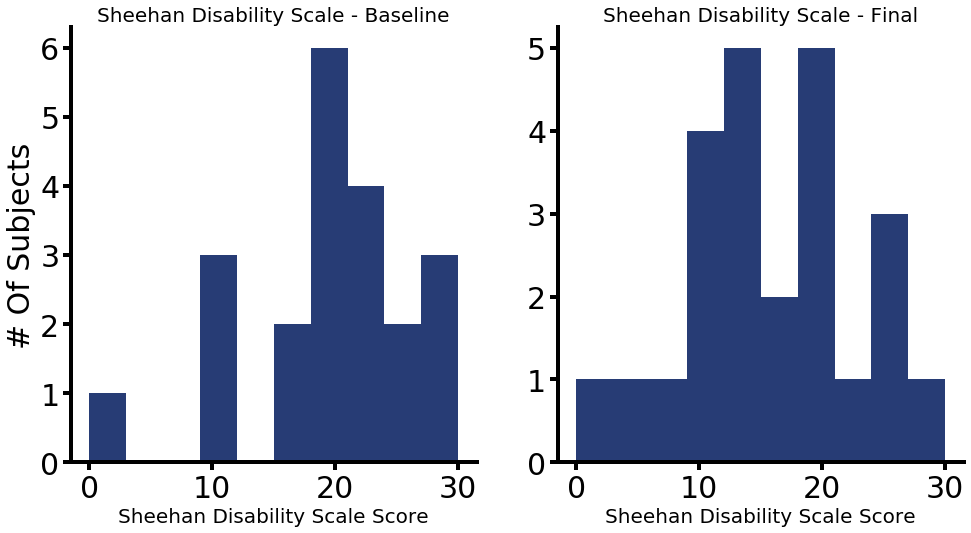

In [4]:
import plot_functions.format_axis as fmt
demog_df['sds_score_change'] = demog_df['sds_score_fp'] - demog_df['sds_score_bs']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes[0].hist(
    demog_df['sds_score_bs'].dropna(),
    color=load_palette()['sds_score_bs'],
)
axes[1].hist(
    demog_df['sds_score_fp'].dropna(),
    color=load_palette()['sds_score_bs'],
)
for ax in axes.flatten():
    ax.set_xlabel('Sheehan Disability Scale Score', fontsize=20)
axes[0].set_ylabel('# Of Subjects', fontsize=20)
fmt.despine_thicken_axes(
    ax=axes[0],
    lw=4,
    fontsize=30,

)
fmt.despine_thicken_axes(
    ax=axes[1],
    lw=4,
    fontsize=30,

)
axes[0].set_title('Sheehan Disability Scale - Baseline', fontsize=20)
axes[1].set_title('Sheehan Disability Scale - Final', fontsize=20)

sns.despine()

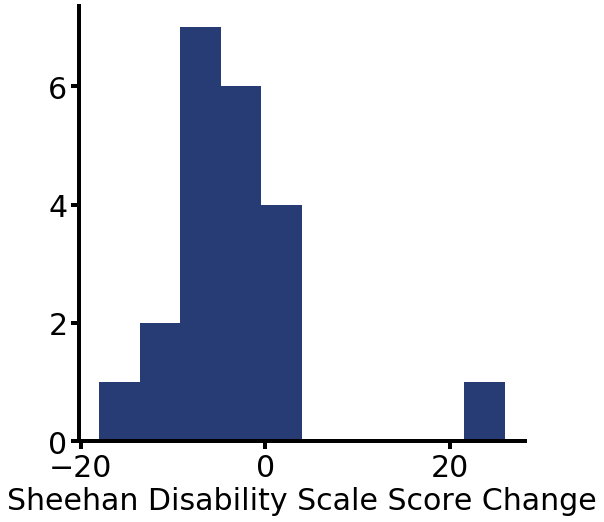

In [4]:
import plot_functions.format_axis as fmt
demog_df['sds_score_change'] = demog_df['sds_score_fp'] - demog_df['sds_score_bs']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.hist(
    demog_df['sds_score_change'].dropna(),
    color=load_palette()['sds_score_bs'],
)

ax.set_xlabel('Sheehan Disability Scale Score Change', fontsize=20)

fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,

)



Text(0.5, 1.0, 'r: 0.4496 p: 0.0313')

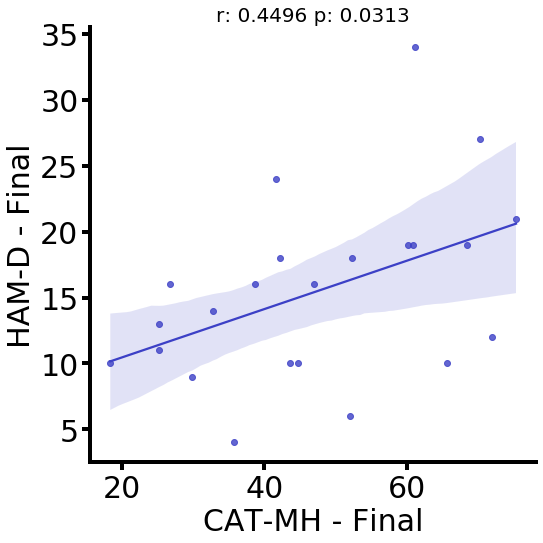

In [19]:
no_na_demog_df = demog_df[['catmh_dep_severity_fp', 'hamd_total_fp']].dropna()
r, p = stats.pearsonr(no_na_demog_df['catmh_dep_severity_fp'], no_na_demog_df['hamd_total_fp'])
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(
    data=demog_df,
    x='catmh_dep_severity_fp',
    y='hamd_total_fp',
    ax=ax,
    color=palette['catmh_dep_severity_1'],
)
fmt.despine_thicken_axes(
    ax=ax,
    lw=4,
    fontsize=30,
)
ax.set_ylabel('HAM-D - Final') # (10 Day Rolling Average Before Score)
ax.set_xlabel('CAT-MH - Final', fontsize=30)
ax.set_title('r: ' + str(round(r,4)) + ' p: ' + str(round(p,4)), fontsize=20)